# 00_2.Python 기초 및 데이터 처리(연습문제)

## Q1. 변수와 데이터 포멧팅을 이용해 본인을 소개해 보세요
- 이름(name)
- 나이(age)
- 소속(dep)
- 직위(pos)
- 취미(hob)

In [1]:
name = "이상철"
age = 54
dep = "강서대학교 빅데이터경영학과"
pos = "교수"
hob = "코딩"

In [2]:
print("안녕하세요.")
print("저의 이름은", name, "이라고 합니다.")
print("간단하게 제 소개를 하고자 합니다.")
# 문자열 포멧 이용
print("----------------------")
print('이름: %s' % name)
print('나이: %0.0f' % age)
print('소속: %s' % dep)
print('직위: %s' % pos)
print('취미: %s' % hob)

안녕하세요.
저의 이름은 이상철 이라고 합니다.
간단하게 제 소개를 하고자 합니다.
----------------------
이름: 이상철
나이: 54
소속: 강서대학교 빅데이터경영학과
직위: 교수
취미: 코딩


## Q2. 아래의 순서대로 데이터를 처리하세요

- 1.00_02.weather를 가져오기
- 2.origin(출발공항)이 EWR 또는 JFK만 가져오기
- 3.origin에서 temp까지 변수를 모두 가져오기
- 4.화씨 온도를 섭씨온도로 변환하기(F-32)/1.8
- 5.월별 평균 온도(섭씨)구하기
- 6.평균이 높은 값으로 sorting

### 1.00_02.weather를 가져오기

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/00_2.weather.csv"
weather_df = pd.read_csv(url, encoding="cp949")
weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid
0,EWR,2013,1,9,15,48.92,37.04,63.39
1,JFK,2013,3,3,22,30.02,15.08,53.29
2,LGA,2013,11,24,4,24.98,6.98,45.74
3,EWR,2013,4,17,9,57.92,42.08,55.47
4,JFK,2013,5,23,5,62.96,60.98,93.25


### 2.origin(출발공항)이 EWR 또는 JFK만 가져오기

In [7]:
weather_df = weather_df[(weather_df.origin == "EWR") | (weather_df.origin == "JFK")]
weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid
0,EWR,2013,1,9,15,48.92,37.04,63.39
1,JFK,2013,3,3,22,30.02,15.08,53.29
3,EWR,2013,4,17,9,57.92,42.08,55.47
4,JFK,2013,5,23,5,62.96,60.98,93.25
7,EWR,2013,12,12,21,21.92,6.98,52.01


### 3.origin에서 temp까지 변수를 모두 가져오기

In [8]:
# 변수명만 추출
weather_df.columns.tolist()

['origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid']

In [9]:
weather_df = weather_df[['origin', 'year', 'month', 'day', 'hour', 'temp']]
weather_df

,origin,year,month,day,hour,temp
0,EWR,2013,1,9,15,48.92
1,JFK,2013,3,3,22,30.02
3,EWR,2013,4,17,9,57.92
4,JFK,2013,5,23,5,62.96
7,EWR,2013,12,12,21,21.92
...,...,...,...,...,...,...
991,EWR,2013,4,3,13,46.94
993,JFK,2013,6,28,10,78.98
996,EWR,2013,8,4,12,80.06
997,EWR,2013,3,28,11,50.00


### 4.화씨 온도를 섭씨온도로 변환하기(F-32)/1.8

In [10]:
weather_df["temp_c"] = (weather_df["temp"]-32)/1.8
weather_df

,origin,year,month,day,hour,temp,temp_c
0,EWR,2013,1,9,15,48.92,9.4
1,JFK,2013,3,3,22,30.02,-1.1
3,EWR,2013,4,17,9,57.92,14.4
4,JFK,2013,5,23,5,62.96,17.2
7,EWR,2013,12,12,21,21.92,-5.6
...,...,...,...,...,...,...,...
991,EWR,2013,4,3,13,46.94,8.3
993,JFK,2013,6,28,10,78.98,26.1
996,EWR,2013,8,4,12,80.06,26.7
997,EWR,2013,3,28,11,50.00,10.0


### 5.월별 평균 온도(섭씨)구하기+6.평균이 높은 값으로 sorting

In [11]:
# weather_df.groupby('month')['temp_c'].mean().sort_values(ascending = False)
weather_df.groupby('month')['temp_c'].mean() \
    .sort_values(ascending = False) \
    .head()

month
7    27.177465
8    24.454902
6    20.916000
9    20.144186
5    16.675000
Name: temp_c, dtype: float64

## Q3.그래프 그리기(seaborn)(연습문제)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 세션 다시 시작 ＊＊＊＊

In [2]:
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

### 3.1.데이터 불러오기
- island : 서식지
- species : 펭귄 종
- bill_length_mm : 부리 길이
- bill_depth_mm : 부리 두께
- flipper_length_mm: 날개 길이
- body_mass_g: 몸무게
- sex: 성별

In [3]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### 3.2 seaborn을 이용해 bill_length_mm, bill_depth_mm의 산점도 그래프

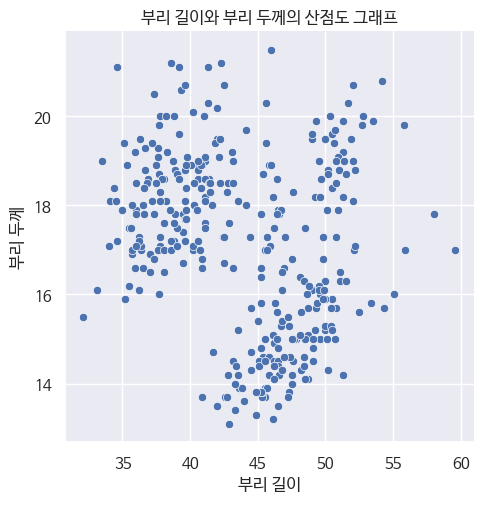

In [14]:
g = sns.relplot(x = "bill_length_mm",
                y = "bill_depth_mm",
                data = penguins)
g.set(title = "부리 길이와 부리 두께의 산점도 그래프",
      xlabel = "부리 길이",
      ylabel = "부리 두께")
plt.show()

### 3.3 matplotlib을 이용해 bill_length_mm, bill_depth_mm의 산점도 그래프

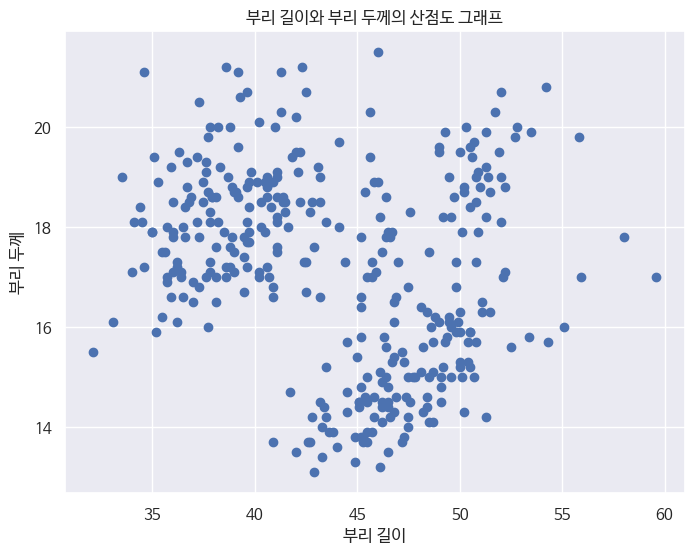

In [15]:
x = np.array(penguins.bill_length_mm)
y = np.array(penguins.bill_depth_mm)

fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(x, y)
ax.set(title = "부리 길이와 부리 두께의 산점도 그래프",
      xlabel = "부리 길이",
      ylabel = "부리 두께")
plt.show()

### 3.4 pdplot을 이용해 bill_length_mm, bill_depth_mm의 산점도 그래프

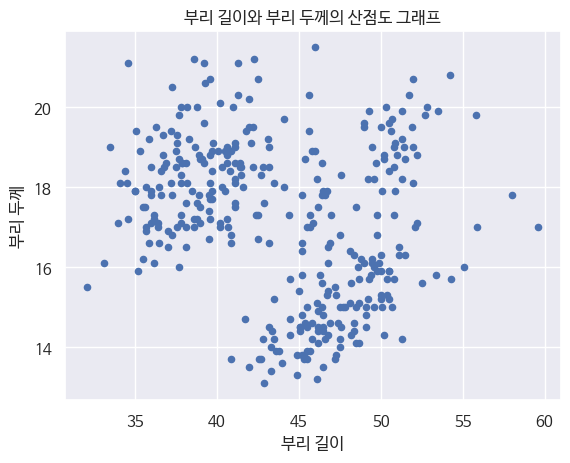

In [16]:
ax = penguins.plot.scatter(x = "bill_length_mm",
                       y = "bill_depth_mm")
ax.set(title = "부리 길이와 부리 두께의 산점도 그래프",
      xlabel = "부리 길이",
      ylabel = "부리 두께")
plt.show()

### 3.5 수치형 자료 관계 파악

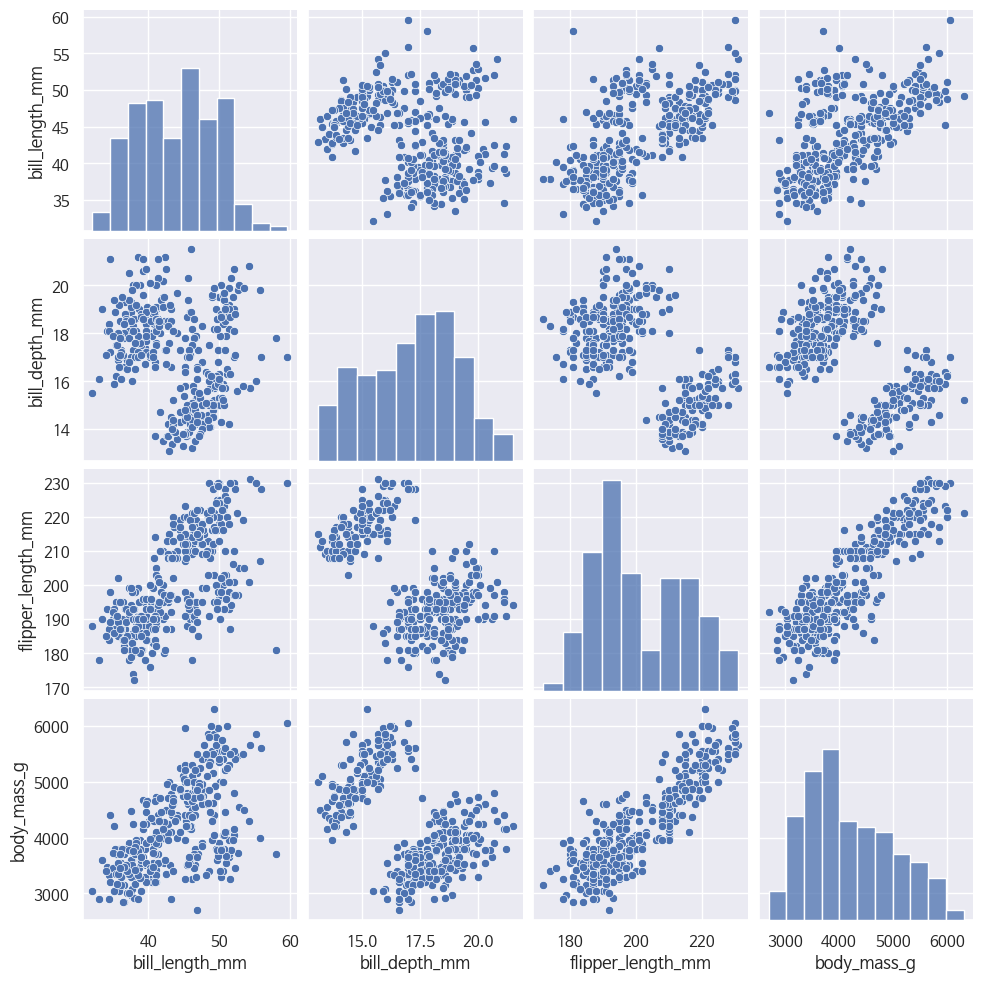

In [4]:
sns.pairplot(penguins)
plt.show()

### 3.6 그룹별 분석

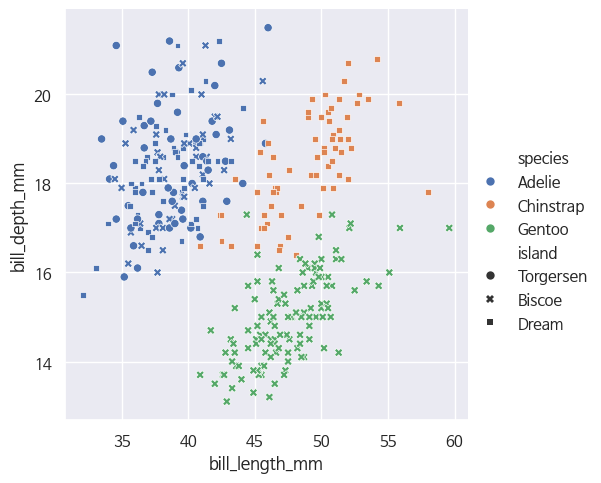

In [5]:
sns.relplot(x = "bill_length_mm",
            y = "bill_depth_mm",
            hue = "species",
            style = "island",
            data = penguins)
plt.show()